In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier as RFC, AdaBoostClassifier as ABC
from sklearn.linear_model import LogisticRegression as LoR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.externals import joblib

import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_20_Customer_Churn_Analysis.csv')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

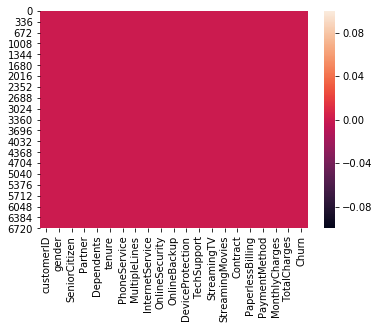

In [6]:
#Checking for null values

sns.heatmap(data.isnull())

No missing values are present in dataset

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
#target column
data.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [9]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#Checking unique values in customerID

data.customerID.nunique()

#Customer id is unique we will remove it 

7043

In [11]:
#From the above data info Total Charges is having object datatype and having numerical values
#We will convert it into float
#Removing strigs
data["TotalCharges"]=data["TotalCharges"].str.strip()

In [12]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [14]:
#Few values are missing from TotalCharges
#As it is integer type we will use mean to replace missing values

data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)

In [15]:
#Checking again for null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Now we will delete customerID from out Dataset

In [17]:
data.drop(['customerID'],inplace=True,axis=1)

In [18]:
#Visualizing data

#First we will check count of Churns

data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

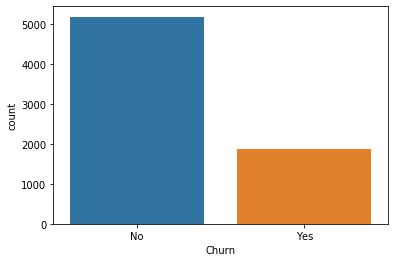

In [19]:
sns.countplot(x='Churn',data=data)
plt.show()

As we can see, Yes is very less than No, and it looks like imbalanced data

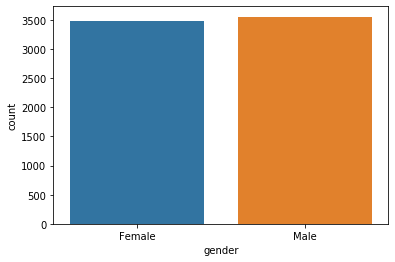

In [20]:
sns.countplot(x='gender',data=data)
plt.show()

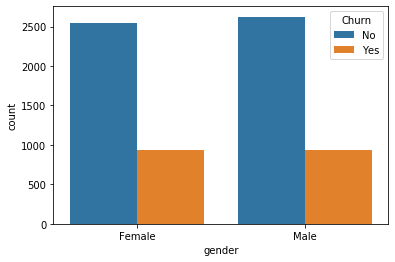

In [21]:
sns.countplot(x='gender',hue='Churn',data=data)
plt.show()

Churn value for both gender is same

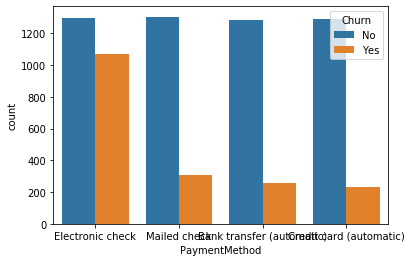

In [22]:
sns.countplot(x='PaymentMethod',hue='Churn',data=data)
plt.show()

Electronic check is having more churn value than other.

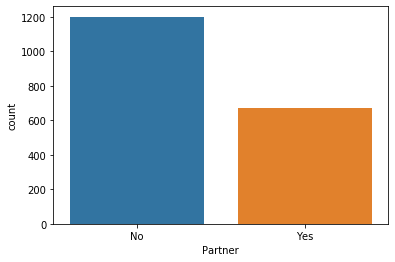

In [23]:
sns.countplot(x='Partner',data=data.loc[data["Churn"]=="Yes"])
plt.show()

Churn value for person having no partner is high

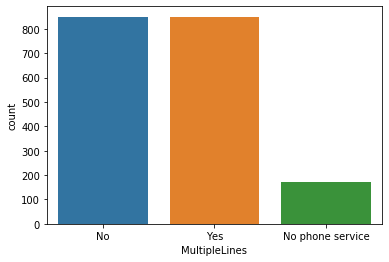

In [24]:
sns.countplot(x='MultipleLines',data=data.loc[data["Churn"]=="Yes"])
plt.show()

Churn value is almost same for Multiple lines except No phone service

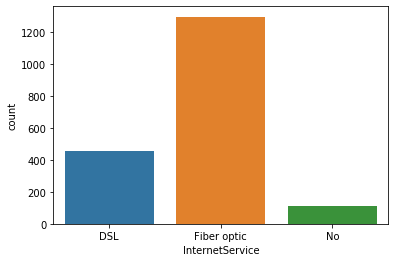

In [25]:
sns.countplot(x='InternetService',data=data.loc[data["Churn"]=="Yes"])
plt.show()

Chrun is high for the Fiber optic service people.

In [26]:
#Encoding categorical data

le = LE()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

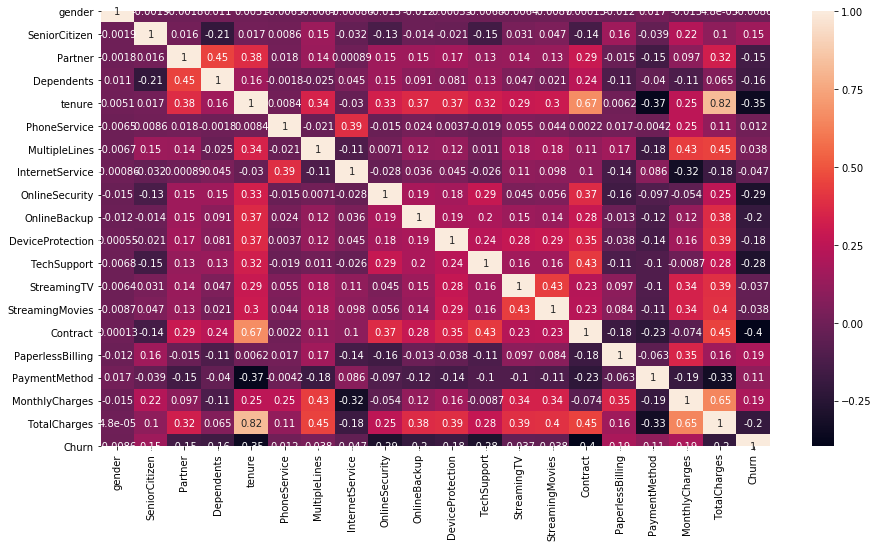

In [27]:
#Checking the correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

From the above heatmap we can say that, Churn is higly nregatively correlated with Contract, Tenure, OnlineSecurity and TechSupport.

In [28]:
#Describing dataset

data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


Data looks normal, still difference is present in TotalCharges and MonthlyCharges

gender                 AxesSubplot(0.125,0.536818;0.065678x0.343182)
SeniorCitizen       AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Partner             AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Dependents          AxesSubplot(0.361441,0.536818;0.065678x0.343182)
tenure              AxesSubplot(0.440254,0.536818;0.065678x0.343182)
PhoneService        AxesSubplot(0.519068,0.536818;0.065678x0.343182)
MultipleLines       AxesSubplot(0.597881,0.536818;0.065678x0.343182)
InternetService     AxesSubplot(0.676695,0.536818;0.065678x0.343182)
OnlineSecurity      AxesSubplot(0.755508,0.536818;0.065678x0.343182)
OnlineBackup        AxesSubplot(0.834322,0.536818;0.065678x0.343182)
DeviceProtection          AxesSubplot(0.125,0.125;0.065678x0.343182)
TechSupport            AxesSubplot(0.203814,0.125;0.065678x0.343182)
StreamingTV            AxesSubplot(0.282627,0.125;0.065678x0.343182)
StreamingMovies        AxesSubplot(0.361441,0.125;0.065678x0.343182)
Contract               AxesSubplot

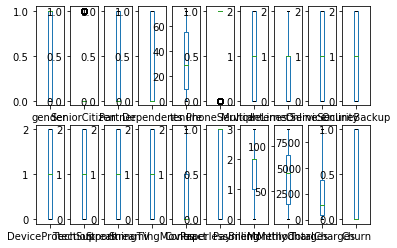

In [29]:
#Checking for outliers
#displaying box plot for outliers
data.plot(kind='box',subplots=True,layout=(2,10))

Data look normally.

### SPLITTING DATA

In [30]:
x = data.drop(['Churn'],axis=1)
y = data.Churn

In [31]:
x.shape

(7043, 19)

In [32]:
#Checking for skewness 

x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

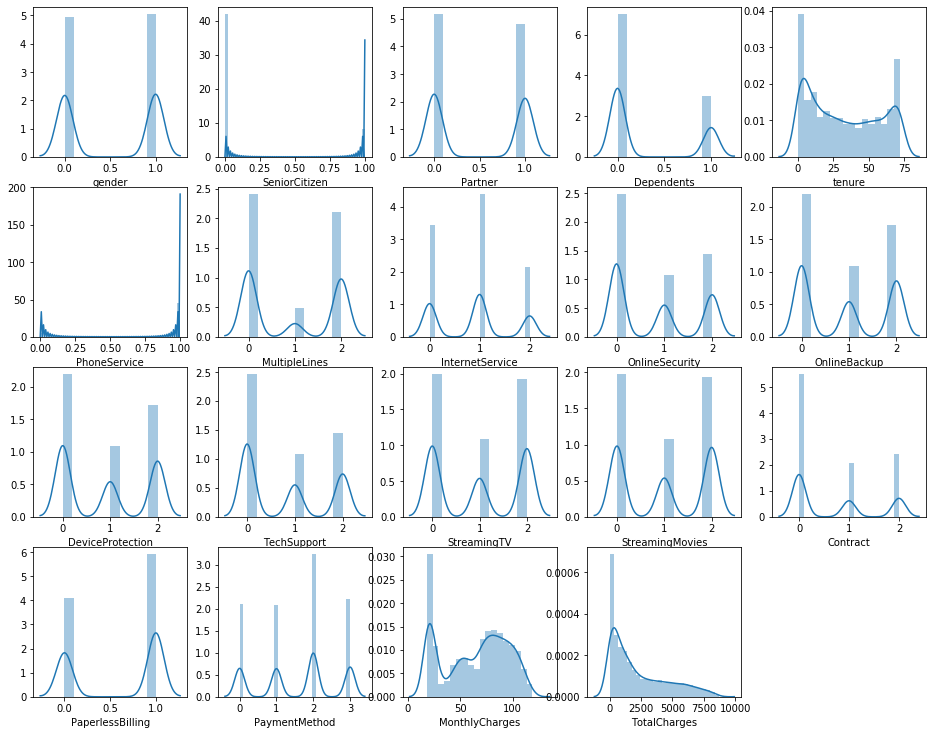

In [33]:
#Visualizing skewness
collist = x.columns.values
ncol = 5
nrows = 5
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(x[collist[i]])

In [34]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])

In [35]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.434281
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges       -0.745402
dtype: float64

Now Data look normally distributed

In [36]:
#Lets scale the data using Standard Scalar

ss=SS()
ss.fit(x)
x=ss.transform(x)

### TEST AND TRAIN MODEL

In [37]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score

def main_fun(models):
    accuracy_scores = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        i = 0
        max_accu_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            accu_score = roc_auc_score(test_y,pred_y)
            accu_score = round(accu_score*100)
            if accu_score > max_accu_score:
                max_accu_score = accu_score
                final_r_state = r_state
        print("Max ROC Score Corresponding to random state ", final_r_state, " is ",max_accu_score)
        print()
        print("-----------------------------------------------------------------------------------------------")
        accuracy_scores.append(max_accu_score)
    return accuracy_scores

In [38]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNN()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 26}

In [39]:
#Finding best parameters for SVC

svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [40]:
#Finding best parameters for RFC

rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [41]:
#Instantiate the classifiers
clf_logreg = LoR()
clf_tree = DTC()
clf_knn =  KNN(n_neighbors=26)
clf_forest = RFC(n_estimators=100)
clf_ada = ABC()
clf_gnb = GNB()
clf_svc = SVC(kernel="linear",C=0.1)

In [42]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'RandomForest', 'Adaboost','Naive','SVC']

In [43]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_gnb: 'Naive',
          clf_svc: 'SVC'
         }

In [44]:
auc_roc_score = main_fun(models)

Checking ROC score for LogisticRegression
Max ROC Score Corresponding to random state  42  is  74.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
Max ROC Score Corresponding to random state  43  is  69.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
Max ROC Score Corresponding to random state  43  is  73.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
Max ROC Score Corresponding to random state  57  is  71.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Adaboost
Max ROC Score Corresponding to random state  92  is  75.0

-----------------------------------------------------------------------------------------------
Checking ROC score for Naive
Max ROC Score Correspon

### USING CROSS VALIDATION

In [45]:
#As this data set seems to be imbalanced we will calculate auc_roc_score instead accuracy_score

def cross_val_main_fun(models):
    roc_auc_score_array = []
    for model,name in models.items():
        print("Checking ROC score for",name)
        
        score = cross_val_score(model,x,y,cv=5,scoring='roc_auc')

        max_auc_score = round(score.mean()*100)
        print('AUC ROC Score: ', score)
        print('Mean Scores: ',score.mean())
        print('Standard deviation: ',score.std())
        print('Final ROC Score :', round(score.mean()*100))
        
        print()
        print("-----------------------------------------------------------------------------------------------")
        roc_auc_score_array.append(max_auc_score)
    return roc_auc_score_array


In [46]:
auc_roc_score_cross_val = cross_val_main_fun(models)

Checking ROC score for LogisticRegression
AUC ROC Score:  [0.86275026 0.85905087 0.83471932 0.84346534 0.84519371]
Mean Scores:  0.8490359000449507
Standard deviation:  0.010384040326309971
Final ROC Score : 85.0

-----------------------------------------------------------------------------------------------
Checking ROC score for DecisionTree
AUC ROC Score:  [0.67563874 0.65700483 0.63928931 0.61463226 0.66918342]
Mean Scores:  0.6511497120856223
Standard deviation:  0.0220608396633224
Final ROC Score : 65.0

-----------------------------------------------------------------------------------------------
Checking ROC score for KNN
AUC ROC Score:  [0.83940169 0.83259061 0.80946292 0.81264305 0.81238559]
Mean Scores:  0.8212967727990513
Standard deviation:  0.012244794544403985
Final ROC Score : 82.0

-----------------------------------------------------------------------------------------------
Checking ROC score for RandomForest
AUC ROC Score:  [0.83668139 0.83608463 0.80655661 0.81101

In [47]:
#Displaying score by train test split
pd.DataFrame(auc_roc_score,columns = ['AUC ROC Scores'],index = classifiers).sort_values(by = 'AUC ROC Scores',ascending = False)

,AUC ROC Scores
Naive,77.0
Adaboost,75.0
LogisticRegression,74.0
KNN,73.0
SVC,73.0
RandomForest,71.0
DecisionTree,69.0


FROM THE ABOVE OBSERVATION, WE CAN SAY THAT NAIVE BAYES HAS DONE WELL WITH DATA AND GAVE MAX ROC SCORE OF 77%. WE ARE SAVING NAIVE BAYES AS OUR FINAL MODEL

In [48]:
#NAIVE BAYES gave max score for random state = 42
gnb = GNB()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=42)
gnb.fit(train_x,train_y)
pred_y = gnb.predict(test_x)
roc_auc_score = roc_auc_score(test_y,pred_y)
roc_auc_score = round((roc_auc_score)*(100))
print("ROC AUC score is : ", roc_auc_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  77.0
Confusion matrix is

[[791 245]
 [ 85 288]]
Classification report 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      1036
           1       0.54      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409



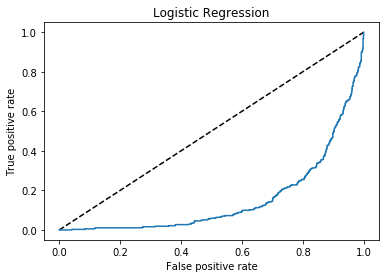

In [49]:
y_pred_prob = gnb.predict_proba(test_x)[:,0]
fpr,tpr,thresholds = roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

### SAVING MODEL

In [50]:
joblib.dump(gnb, 'Project_20_Customer_Churn_Analysis.pkl')    

['Project_20_Customer_Churn_Analysis.pkl']

### CONCLUSION

In this project, after importing dataset checked for info and datatype and found that many columns were in object, and converted it to integer. 

From the dataset, I found that the value of churnned customer was very high and result into the data imbalanced, also from dataset Electronic check is having more churn value than other.

Churn value for person having no partner is high.

Chrun is high for the Fiber optic service people.

Churn value is almost same for Multiple lines except No phone service.

After using multiple data processing techinques used some algorithm to calculate auc_roc_score, and found that GaussianNB has performed well than other. Hence GNB is used to save our final model.